# Лабораторная работа №2. Реализация глубокой нейронной сети
          	Данные: В работе предлагается использовать набор данных notMNIST, который состоит из изображений размерностью 28×28 первых 10 букв латинского алфавита (A … J, соответственно). Обучающая выборка содержит порядка 500 тыс. изображений, а тестовая – около 19 тыс.
          	Данные можно скачать по ссылке:
https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz (большой набор данных);
https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz (маленький набор данных);

Описание данных на английском языке доступно по ссылке:
http://yaroslavvb.blogspot.sg/2011/09/notmnist-dataset.html


# Задание 1.
Реализуйте полносвязную нейронную сеть с помощью библиотеки Tensor Flow. В качестве алгоритма оптимизации можно использовать, например, стохастический градиент (Stochastic Gradient Descent, SGD). Определите количество скрытых слоев от 1 до 5, количество нейронов в каждом из слоев до нескольких сотен, а также их функции активации (кусочно-линейная, сигмоидная, гиперболический тангенс и т.д.).

In [26]:
import hashlib
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

image_dir = './notMNIST_large'
img_height, img_width = 28, 28
s = img_height * img_width


def read_dataset(path, classes):
    X, y = [], []
    for root, _, files in os.walk(path):
        for file in files:
            try:
                im = mpimg.imread(os.path.join(root, file))
                X.append(im.reshape(s, 1))
                dir_name = os.path.basename(root)
                y.append(classes.index(dir_name))
            except Exception as ex:
                print(ex)

    x_len = len(X)
    return np.array(X).reshape(x_len, s).T, np.array(y)


def remove_duplicates(X, y, X_read_only):
    x_hashes = np.array([hashlib.sha256(img).hexdigest() for img in X])
    x_read_only_hashes = np.array([hashlib.sha256(img).hexdigest() for img in X_read_only])

    indexes_to_remove = []
    for i, h in enumerate(x_hashes):
        duplicates = np.where(x_read_only_hashes == h)
        if len(duplicates[0]):
            indexes_to_remove.append(i)

    print("Removed {} duplicates".format(len(indexes_to_remove)))

    if len(indexes_to_remove):
        return np.delete(X, indexes_to_remove, 0), np.delete(y, indexes_to_remove, 0)

    return X, y


classes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
X, y = read_dataset(image_dir, classes)

X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.2)
X_train, y_train = remove_duplicates(X_train, y_train, X_test)

invalid PNG header
read past end of file
read past end of file
read past end of file
read past end of file
Removed 28694 duplicates


Train on 315677 samples, validate on 78920 samples
105823/105823 [==============================] - 4s 41us/sample - loss: 0.4517 - accuracy: 0.8644
Train on 315677 samples, validate on 78920 samples
Epoch 1/5
315677/315677 [==============================] - 5s 16us/sample - loss: 0.5901 - accuracy: 0.8291 - val_loss: 0.4614 - val_accuracy: 0.8628
Epoch 2/5
315677/315677 [==============================] - 7s 21us/sample - loss: 0.4226 - accuracy: 0.8726 - val_loss: 0.4004 - val_accuracy: 0.8789
Epoch 3/5
315677/315677 [==============================] - 6s 18us/sample - loss: 0.3738 - accuracy: 0.8870 - val_loss: 0.3733 - val_accuracy: 0.8867
Epoch 4/5
315677/315677 [==============================] - 4s 14us/sample - loss: 0.3458 - accuracy: 0.8945 - val_loss: 0.3605 - val_accuracy: 0.8904
Epoch 5/5
105823/105823 [==============================] - 6s 57us/sample - loss: 0.3438 - accuracy: 0.8970
Train on 315677 samples, validate on 78920 samples
Epoch 1/10
315677/315677 [===============

315677/315677 [==============================] - 3s 8us/sample - loss: 0.1983 - accuracy: 0.9376 - val_loss: 0.3332 - val_accuracy: 0.9064
Epoch 21/25
315677/315677 [==============================] - 3s 8us/sample - loss: 0.1929 - accuracy: 0.9391 - val_loss: 0.3399 - val_accuracy: 0.9065
Epoch 22/25
315677/315677 [==============================] - 3s 10us/sample - loss: 0.1877 - accuracy: 0.9407 - val_loss: 0.3459 - val_accuracy: 0.9070
Epoch 23/25
315677/315677 [==============================] - 3s 11us/sample - loss: 0.1840 - accuracy: 0.9419 - val_loss: 0.3429 - val_accuracy: 0.9085
Epoch 24/25
315677/315677 [==============================] - 3s 8us/sample - loss: 0.1802 - accuracy: 0.9431 - val_loss: 0.3468 - val_accuracy: 0.9062
Epoch 25/25
105823/105823 [==============================] - 3s 31us/sample - loss: 0.3636 - accuracy: 0.9062


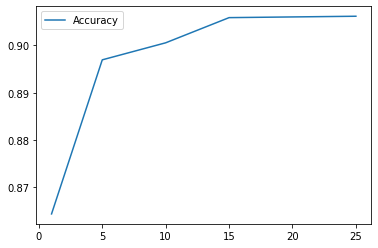

In [30]:
accuracies, epoch_nums = [], [1, 5, 10, 15, 25]

for epoch_num in epoch_nums:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=epoch_num, batch_size=1024, validation_split=0.2)
    accuracies.append(model.evaluate(X_test, y_test)[1])

plt.plot(epoch_nums, accuracies, label="Accuracy")
plt.legend()
plt.show()

# Задание 2.
Как улучшилась точность классификатора по сравнению с логистической регрессией?

Logistic regression accuracy was about 81%. Using DNN the accuracy is 90,62%.

# Задание 3.
Используйте регуляризацию и метод сброса нейронов (dropout) для борьбы с переобучением. Как улучшилось качество классификации?

In [34]:
dropout_rate = 0.1
l2_reg_value = 1e-4

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg_value)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg_value)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg_value)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=25, validation_split=0.2, batch_size=1024)
model.evaluate(X_test, y_test)

Train on 315677 samples, validate on 78920 samples
Epoch 1/25
315677/315677 [==============================] - 5s 14us/sample - loss: 0.6661 - accuracy: 0.8158 - val_loss: 0.5000 - val_accuracy: 0.8632
Epoch 2/25
315677/315677 [==============================] - 4s 12us/sample - loss: 0.4963 - accuracy: 0.8642 - val_loss: 0.4462 - val_accuracy: 0.8778
Epoch 3/25
315677/315677 [==============================] - 4s 13us/sample - loss: 0.4527 - accuracy: 0.8764 - val_loss: 0.4201 - val_accuracy: 0.8855
Epoch 4/25
315677/315677 [==============================] - 5s 14us/sample - loss: 0.4287 - accuracy: 0.8829 - val_loss: 0.4019 - val_accuracy: 0.8908
Epoch 5/25
315677/315677 [==============================] - 6s 19us/sample - loss: 0.4106 - accuracy: 0.8881 - val_loss: 0.3982 - val_accuracy: 0.8914
Epoch 6/25
315677/315677 [==============================] - 4s 14us/sample - loss: 0.3979 - accuracy: 0.8917 - val_loss: 0.3865 - val_accuracy: 0.8945
Epoch 7/25
315677/315677 [=================

[0.34654313060732733, 0.9075059]

Accuracy is 90,75% (increased on 0.13%).

# Задание 4. 
Воспользуйтесь динамически изменяемой скоростью обучения (learning rate). 
Наилучшая точность, достигнутая с помощью данной модели составляет 97.1%.
Какую точность демонстрирует Ваша реализованная модель?

Train on 315677 samples, validate on 78920 samples
Epoch 1/25
315677/315677 [==============================] - 7s 22us/sample - loss: 1.1265 - accuracy: 0.6834 - val_loss: 0.6671 - val_accuracy: 0.8208
Epoch 2/25
315677/315677 [==============================] - 4s 12us/sample - loss: 0.6784 - accuracy: 0.8161 - val_loss: 0.5977 - val_accuracy: 0.8366
Epoch 3/25
315677/315677 [==============================] - 4s 12us/sample - loss: 0.6196 - accuracy: 0.8307 - val_loss: 0.5657 - val_accuracy: 0.8449
Epoch 4/25
315677/315677 [==============================] - 4s 12us/sample - loss: 0.5864 - accuracy: 0.8395 - val_loss: 0.5418 - val_accuracy: 0.8517
Epoch 5/25
315677/315677 [==============================] - 4s 12us/sample - loss: 0.5630 - accuracy: 0.8455 - val_loss: 0.5232 - val_accuracy: 0.8563
Epoch 6/25
315677/315677 [==============================] - 4s 12us/sample - loss: 0.5427 - accuracy: 0.8509 - val_loss: 0.5085 - val_accuracy: 0.8608
Epoch 7/25
315677/315677 [=================

Epoch 3/25
315677/315677 [==============================] - 4s 13us/sample - loss: 0.4550 - accuracy: 0.8762 - val_loss: 0.4264 - val_accuracy: 0.8842
Epoch 4/25
315677/315677 [==============================] - 4s 12us/sample - loss: 0.4294 - accuracy: 0.8829 - val_loss: 0.4013 - val_accuracy: 0.8909
Epoch 5/25
315677/315677 [==============================] - 4s 12us/sample - loss: 0.4113 - accuracy: 0.8880 - val_loss: 0.3916 - val_accuracy: 0.8922
Epoch 6/25
315677/315677 [==============================] - 4s 13us/sample - loss: 0.3990 - accuracy: 0.8910 - val_loss: 0.3856 - val_accuracy: 0.8938
Epoch 7/25
315677/315677 [==============================] - 4s 12us/sample - loss: 0.3875 - accuracy: 0.8944 - val_loss: 0.3772 - val_accuracy: 0.8974
Epoch 8/25
315677/315677 [==============================] - 4s 12us/sample - loss: 0.3803 - accuracy: 0.8963 - val_loss: 0.3723 - val_accuracy: 0.8987
Epoch 9/25
315677/315677 [==============================] - 4s 11us/sample - loss: 0.3741 - ac

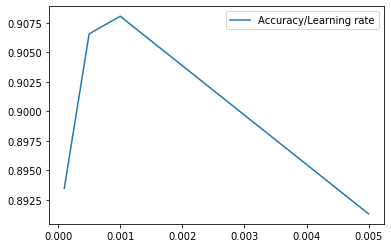

In [35]:
dropout_rate = 0.1
l2_reg_value = 1e-4
accuracies, learning_rates = [], [1e-4, 5e-4, 1e-3, 5e-3]

for learning_rate in learning_rates:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg_value)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg_value)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg_value)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=25, batch_size=1024, validation_split=0.2)
    accuracies.append(model.evaluate(X_test, y_test)[1])

plt.plot(learning_rates, accuracies, label="Accuracy/Learning rate")
plt.legend()
plt.show()

The best accuracy is 90.8%